In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

In [95]:
start_time = time.time()

In [96]:
df_water = pd.read_csv('./water_usage.csv')
df_water.drop(['unit'], axis=1, inplace=True)
df_water.head()
A = np.sum(df_water['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])
print(B)### calculate the average daily electricity consumption


1.838398691


In [97]:
df = pd.read_csv('./dam_elec_water.csv')
elecG = df['elecG']
elecH = df['elecH']
waterG = df['waterG']
levelG = df['levelG']
waterH = df['waterH']
levelH = df['levelH']

def water_convert(water):
    water = water * 325846.885 / 1e9
    return water

waterG = water_convert(waterG)
print(waterG)

waterH = water_convert(waterH)
print(waterH)


0     6258.206150
1     5144.887053
2     4082.235843
3     3241.304539
4     3438.286802
5     3859.026165
6     3904.970576
7     4253.481089
8     4728.070886
9     4794.428952
10    5090.989697
11    4805.520455
12    3703.512155
13    3653.371488
14    3880.111717
15    3985.646354
16    4401.060728
17    3969.324032
18    3767.973792
19    3836.546640
20    2663.323200
Name: waterG, dtype: float64
0     6821.856743
1     5877.418221
2     5225.715979
3     4738.208308
4     5012.089784
5     4734.876850
6     4280.680506
7     4061.603870
8     3743.735346
9     3505.867772
10    3935.262280
11    4496.164355
12    4140.092890
13    3564.962059
14    3281.687721
15    3188.343342
16    3345.644948
17    3305.409701
18    3411.615257
19    3505.497610
20    3106.135431
Name: waterH, dtype: float64


In [98]:
from sympy import *
def ln_fitting(X, Y): ### Y = a * ln X + b
    ### the type of X and Y should be np.array
    a = Symbol('a')
    b = Symbol('b')
    poly1 = a * np.sum(np.square(np.log(X))) + b * np.sum(np.log(X)) - np.sum(np.log(X) * Y) 
    poly2 = a * np.sum(np.log(X)) + b * len(X) - np.sum(Y)
    a, b =  list(solve([poly1, poly2], [a, b]).values())[0], list(solve([poly1, poly2], [a, b]).values())[1]
    return a, b


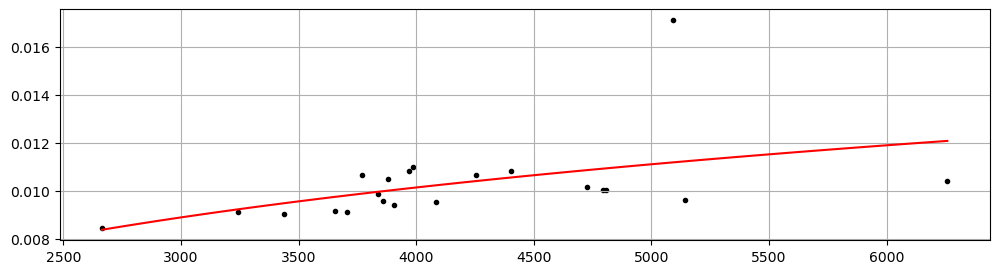

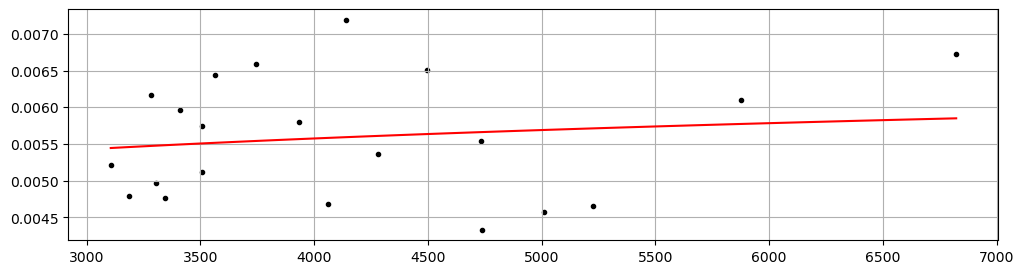

In [99]:
# elec = a * water + b
fig = plt.figure(figsize =(12,3))
plt.scatter(waterG,elecG,marker = '.',color = 'k')
plt.grid(True)
data_g, data_h, data_elec_g, data_elec_h = waterG.to_numpy(), waterH.to_numpy(), elecG.to_numpy(), elecH.to_numpy()
a_G, b_G = ln_fitting(data_g, data_elec_g)

### plot the fitting curve
x = np.linspace(min(data_g), max(data_g), 100)
y = a_G * np.log(x) + b_G
plt.plot(x, y, color = 'r')

fig = plt.figure(figsize =(12,3))
plt.scatter(waterH,elecH,marker = '.',color = 'k')
plt.grid(True)
a_H, b_H = ln_fitting(data_h, data_elec_h)

### plot the fitting curve
x = np.linspace(min(data_h), max(data_h), 100)
y = a_H * np.log(x) + b_H
plt.plot(x, y, color = 'r')


In [100]:
print("Fitting for dam G")
print("---------------------")
print('slope: %.4f' % a_G)
print('intercept: %.4f' % b_G)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (a_G, b_G))

print("Fitting for dam H")
print("---------------------")
print('slope: %.4f' % a_H)
print('intercept: %.4f' % b_H)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (a_H, b_H))


Fitting for dam G
---------------------
slope: 0.0043
intercept: -0.0258
The linear regression function: y = 0.0043 ln(x) + -0.0258
Fitting for dam H
---------------------
slope: 0.0005
intercept: 0.0013
The linear regression function: y = 0.0005 ln(x) + 0.0013


In [101]:
### here mu is the slope
mu_G = a_G
phi_G = b_G
### here mu is the slope
mu_H = a_H
phi_H = b_H

C:\Users\Sycamore\AppData\Local\Temp\ipykernel_12752\1075182930.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelG2waterG.fit(levelG[:,np.newaxis], waterG[:,np.newaxis])


LinearRegression()

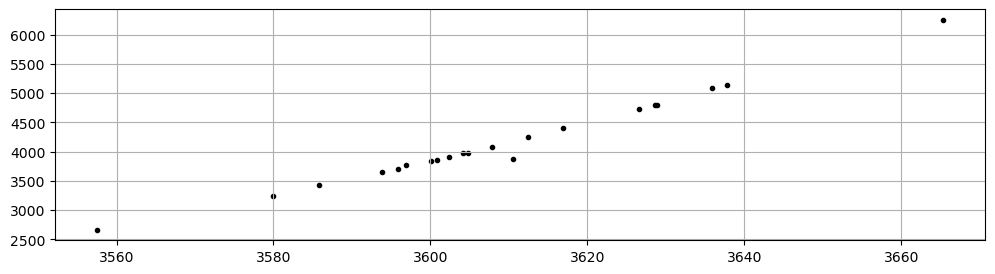

In [102]:
# water = a * level + b
fig = plt.figure(figsize =(12,3))
plt.scatter(levelG,waterG,marker = '.',color = 'k')
plt.grid(True)

levelG2waterG = linear_model.LinearRegression()
levelG2waterG.fit(levelG[:,np.newaxis], waterG[:,np.newaxis])

In [103]:
print('slope: %.4f' % levelG2waterG.coef_[0])
print('intercept: %.4f' % levelG2waterG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

slope: 33.2906
intercept: -115987.1261
The linear regression function: y = 33.2906x + -115987.1261


In [104]:
print('The transformation from level to water volumn for dam G is: volume = %.4f * level + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

The transformation from level to water volumn for dam G is: volume = 33.2906 * level + -115987.1261


C:\Users\Sycamore\AppData\Local\Temp\ipykernel_12752\448444932.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelH2waterH.fit(levelH[:,np.newaxis], waterH[:,np.newaxis])


LinearRegression()

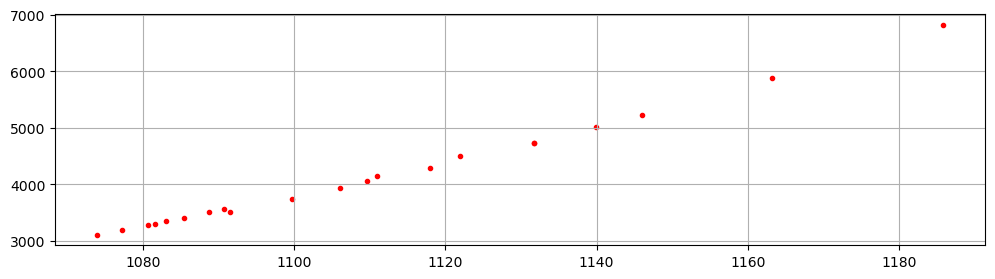

In [105]:
# water = a * level + b
fig = plt.figure(figsize =(12,3))
plt.scatter(levelH,waterH,marker = '.',color = 'r')
plt.grid(True)

levelH2waterH = linear_model.LinearRegression()
levelH2waterH.fit(levelH[:,np.newaxis], waterH[:,np.newaxis])

In [106]:
print('slope: %.4f' % levelH2waterH.coef_[0])
print('intercept: %.4f' % levelH2waterH.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

slope: 31.7852
intercept: -31136.6688
The linear regression function: y = 31.7852x + -31136.6688


In [107]:
print('The transformation from level to water volumn for dam H is: volume = %.4f * level + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

The transformation from level to water volumn for dam H is: volume = 31.7852 * level + -31136.6688


$\mathrm{H}$ 坝水位为 $\mathrm{M}, \mathrm{G}$ 坝水位是 $\mathrm{P}$，对应的水量分别为 $\mathrm{M}_v, \mathrm{P}_v$ 。假设 $\mathrm{H}$ 坝中的 $\lambda$ 比例出水会进入 $\mathrm{G}$ 坝, $\mathrm{H}$ 坝出水速率为 $x$ ， $\mathrm{G}$ 坝出水速率为 $y$. 所有单位时间水需求量是 $A=a_1+a_2+a_3+a_4+a_5$, 单位时间电需求量是 $B=b_1+b_2+b_3+b_4+b_5$, 两个大坝的最低水量之和为 $K$, 分别为 $M_{\min v}, P_{\min v}$ ，提供电力和水量关系系数分别是 $\mu_1, \mu_2$. 两个大坝的最长持续时间是 $T$ 那么满足以下公式:
已知数据: $M, P, A, B, \mu_1, \mu_2, \lambda$ 要求: $x, y, T, M_{\min v}, P_{\min v}$
- $M_v - x * T=M_{\min v} * T$
- $P_v + \lambda * x * T-y * T=P_{\min v} * T$
- $A=y+(1-\lambda) * x$
- $B=\mu_1 * ln(M_{\min v}) + \mu_2 * ln(P_{\min v})$
- $ \frac{M_v}{P_v} = \frac{M_{\min v}}{P_{\min v}} $

解为:

$$
\begin{aligned}
& r = \frac{M_v}{P_v} \\
& P_{\min v} = \mathrm e ^ {\frac{B - \mu_1 * ln(r)}{\mu_1 + \mu_2}} \\
& M_{\min v} = r * P_{\min v} \\
& T=\frac{(r+1) * P_v}{A + (r+1) * P_{\min v}}\\
& x=\frac{M_v}{T} - M_{\min v} \\
& y=A + (\lambda - 1) * x \\
\end{aligned}
$$

In [108]:
M, P = 3e7, 1e7
loss_H = exp(-phi_H / mu_H)
loss_G = exp(-phi_G / mu_G)
M_v = levelG2waterG.coef_[0]*M + levelG2waterG.intercept_ - loss_H
P_v = levelH2waterH.coef_[0]*P + levelH2waterH.intercept_ - loss_G
ratio = (M_v ).squeeze()/(P_v ).squeeze()
P_min = exp((B - mu_H * ln(ratio))/(mu_G + mu_H))
M_min = ratio * P_min
T = (ratio+1) * P_v / (A + (ratio + 1) * P_min)
x = M_v / T - ratio * B / (mu_H * ratio + mu_G)
y = A + (lamb - 1) * x
print(loss_H, loss_G)
print("Assume M and P is 3610.47 and 1080.68, respectively (2021 data)")
print("All the pre-known parameters known from data are:")
print("------------------------------------------------")
print("A = ", A, "with the unit of billion gallons per day")
print("B = ", B, "with the unit of billion kwh per day")
print("lambda = ", lamb)
print("mu_1 = ", mu_H)
print("phi_1 = ", phi_H)
print("mu_2 = ", mu_G)
print("phi_2 = ", phi_G)
print("\n")
print("The further calculated parameters are:")
print("------------------------------------------------")
print('M_v is : {}'.format(M_v + loss_H))
print('P_v is : {}'.format(P_v + loss_G))
print("Assume the ratio is M_v / P_v = M_min v / P_min v = {}".format(ratio))
print("M_min v is : {}".format(M_min + loss_H))
print("P_min v is : {}".format(P_min + loss_G))
print()
print("The final result is:")
print("------------------------------------------------")
print("x = {}".format(x))
print("y = {}".format(y))
print("T = {}".format(T))


0.0774719001390213 385.262774653942
Assume M and P is 3610.47 and 1080.68, respectively (2021 data)
All the pre-known parameters known from data are:
------------------------------------------------
A =  44.26947 with the unit of billion gallons per day
B =  1.838398691 with the unit of billion kwh per day
lambda =  0.1
mu_1 =  0.000513721571784078
phi_1 =  0.00131401757860774
mu_2 =  0.00433555840258486
phi_2 =  -0.0258135923066821


The further calculated parameters are:
------------------------------------------------
M_v is : [998602333.069961]
P_v is : [317820694.580756]
Assume the ratio is M_v / P_v = M_min v / P_min v = 3.14203436254724
M_min v is : 1.22703853292911E+165
P_min v is : 3.90523588015236E+164

The final result is:
------------------------------------------------
x = [1.22703853292911e+165]
y = [-1.10433467963620e+165]
T = [8.13831274400719e-157]


In [111]:
(B - mu_H * ln(ratio))/(mu_G + mu_H)

378.986273437139

In [109]:
end_time = time.time()
print("The total time is: %.4f seconds" %(end_time - start_time))

The total time is: 3.4599 seconds


In [110]:
### add on Jan 12
fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterG']+df['waterH'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
data = np.array([df['waterG']+df['waterH'],df['elec']])
print(data)
a, b = ln_fitting(data[0], data[1])
### plot the fitting line
x = np.linspace(min(data[0]), max(data[0]), 100)
y = a * np.log(x) + b
plt.plot(x, y, 'r')

print('slope: %.4f' % a)
print('intercept: %.4f' % b)
print('The linear regression function: y = %.4f lnx + %.4f' %(a, b))
### 


KeyError: 'elec'

<Figure size 1200x300 with 0 Axes>

In [ ]:
print(exp(-b/a))
print(- a * np.log(193))

223.677221734676
-50.7409440374670
